# My Exercise2

Zhuyuanxuan

## 1 Simple Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
def sigmoid(x):
    z = np.exp(-x)
    sig = 1 / (1 + z)
    return sig


pos=data[data['Admitted'].isin([1])]
neg=data[data['Admitted'].isin([0])]

fig, axs = plt.subplots()
axs.scatter(pos['Exam 1'], pos['Exam 2'], marker='+')
axs.scatter(neg['Exam 1'], neg['Exam 2'], marker='o')
axs.set_xlabel('Exam1')
axs.set_ylabel('Exam2')
plt.show()


In [235]:
def sigmoid(x):
    z = np.exp(-x)
    sig = 1 / (1 + z)
    return sig

def Cost(Theta, X, y):
    Theta = np.matrix(Theta)
    X = np.matrix(X)
    y = np.matrix(y)
    val1 = np.multiply(-y, np.log(sigmoid(X*Theta.T) - 0.00001))
    val2 = np.multiply(1-y, np.log(1-sigmoid(X*Theta.T) -0.00001))
    return np.sum(val1 - val2) / len(X)

#data.insert(0, 'Ones', 1)
data.head()    


,Ones,Exam 1,Exam 2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [245]:
Theta = np.array([0, 0, 0])
X = data.iloc[:,0:data.shape[1] - 1]
y = data.iloc[:,data.shape[1]-1:data.shape[1]]
X = np.array(X.values)
y = np.array(y.values)

def Grad(Theta, X, y):
    X = np.matrix(X)
    y = np.matrix(y)
    Theta = np.matrix(Theta)
    grad = X.T@ (sigmoid(X@ Theta.T) - y)
   
    return (grad.T) / len(X)

def grad_decent(Theta, X, y, alpha, iters):
    temp = Theta
    cost=np.zeros(iters)
    for i in range(iters):
        err = Grad(temp, X, y)
        temp = temp - alpha * err
        cost[i] = Cost(temp, X, y)

    return np.asarray(temp).reshape(-1), cost

    

[-11.97073173   0.10104196   0.09495221]
0.2499590877645471


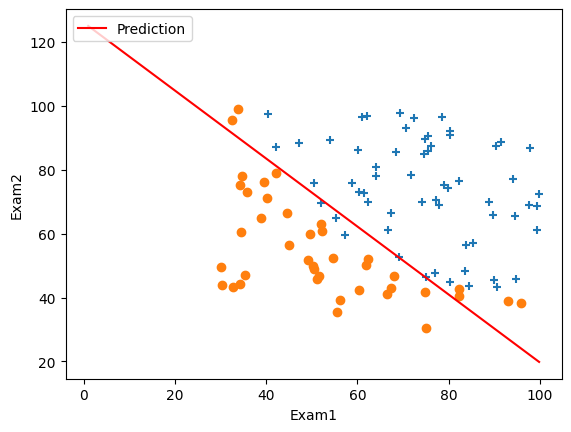

In [248]:
iters = 200000
alpha = 0.002

final_theta, cost = grad_decent(Theta, X, y, alpha, iters)
print(final_theta)
print(cost[iters - 1])

fig, axs = plt.subplots()
# axs.plot(np.arange(iters), cost, 'b')
x1 = np.linspace(X.min(), X.max(), 100)
axs.plot(x1, (-final_theta[0] - x1 * final_theta[1]) / final_theta[2], 'r', label='Prediction')
axs.scatter(pos['Exam 1'], pos['Exam 2'], marker='+')
axs.scatter(neg['Exam 1'], neg['Exam 2'], marker='o')
axs.set_xlabel('Exam1')
axs.set_ylabel('Exam2')
axs.legend(loc=2)

plt.show()


## 2 Regularized logistic regression

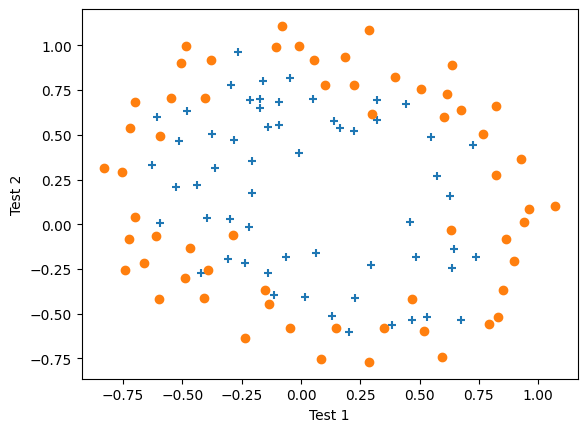

In [175]:
data2 = pd.read_csv("ex2data2.txt", header=None, names=['T1', 'T2', 'Accepted'])
# data2.head()

fig, axs = plt.subplots()
axs.scatter(data2[data2['Accepted'].isin([1])]['T1'], data2[data2['Accepted'].isin([1])]['T2'], marker='+')
axs.scatter(data2[data2['Accepted'].isin([0])]['T1'], data2[data2['Accepted'].isin([0])]['T2'], marker='o')
axs.set_xlabel('Test 1')
axs.set_ylabel('Test 2')
plt.show()

In [176]:
def map_feature(data, degree):
    x1 = data['T1']
    x2 = data['T2']
    data.insert(3, "Ones", 1)
    for i in range(1, degree): # 1...5
        for j in range(0, i+1): # 0...i
            val = np.power(x1, i-j) * np.power(x2, j)
            data['T_'+str(i-j)+str(j)] = val
    data.drop('T1', axis=1, inplace=True)
    data.drop('T2', axis=1, inplace=True)
    return data

data2 = map_feature(data2, 6)
data2.head()


,Accepted,Ones,T_10,T_01,T_20,T_11,T_02,T_30,T_21,T_12,...,T_31,T_22,T_13,T_04,T_50,T_41,T_32,T_23,T_14,T_05
0,1,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,...,0.000094,0.001286,0.017551,0.239497,3.541519e-07,0.000005,0.000066,0.000900,0.012278,0.167542
1,1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,...,-0.000546,0.004035,-0.029801,0.220095,-6.860919e-06,0.000051,-0.000374,0.002764,-0.020412,0.150752
2,1,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,...,-0.006757,0.021886,-0.070895,0.229642,-4.457837e-04,0.001444,-0.004677,0.015151,-0.049077,0.158970
3,1,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,...,-0.026483,0.035465,-0.047494,0.063602,-7.415771e-03,0.009931,-0.013299,0.017810,-0.023851,0.031940
4,1,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,...,-0.062956,0.057116,-0.051818,0.047011,-3.561597e-02,0.032312,-0.029315,0.026596,-0.024128,0.021890


In [177]:
def cost_reg(Theta, X, y, lamda):
    Theta = np.matrix(Theta)
    X = np.matrix(X)
    y = np.matrix(y)
    val1 = np.multiply(np.log(sigmoid(X@Theta)).T, -y) - np.multiply(np.log(1-sigmoid(X@Theta)).T, 1-y)
    val1 = np.sum(val1) / len(X)
    return val1 + lamda * np.sum(np.power(Theta[1:], 2)) / len(Theta) / 2

def grad_reg(Theta, X, y, lamda):
    Theta = np.matrix(Theta)
    X = np.matrix(X)
    y = np.matrix(y)
    # err
    error = (X.T @ (sigmoid(X@Theta).T - y).T + Theta * lamda) / len(X)
    #print(error[0])
    # fix j=0
    error[0] = error[0] - Theta[0] * lamda / len(X)
    return error

# gradent decent...
def grad_reg_de(Theta, X, y, lamda, alpha, iters):
    temp = Theta
    cost = np.zeros(iters)
    for i in range(iters):
        temp = temp - alpha * grad_reg(temp, X, y, lamda)
        cost[i] = cost_reg(temp, X, y, lamda)
        if (i % 10000 == 0):
            print(cost[i])

    return temp, cost

n = data2.shape[1] - 1

X = data2.iloc[:,1:data2.shape[1]]
y = data2.iloc[:,0]
Theta = np.zeros((n, 1))
x_len = X.shape[1]
print("xlen", x_len)

cost_reg(Theta, X, y, 0.1)

alpha2 = 0.001
iters2 = 100000
Theta, cost = grad_reg_de(Theta, X, y, 0.01, alpha2, iters2)
print("final cost:", cost[iters2-1])

xlen 21
0.6931369443692074
0.6340165654350156
0.5975059403685976
0.5693801715475693
0.5465866804150977
0.5276875549725178
0.5117837480859525
0.49824196745566285
0.4865946988095979
0.47648848768858243
final cost: 0.4676523713162996


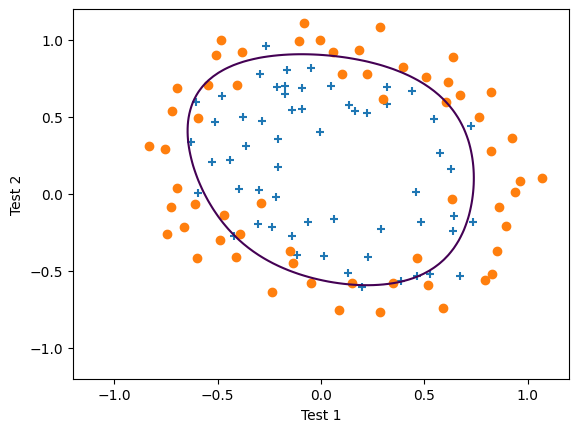

In [178]:
# boundry
def map_xy(x1, x2, degree, xlen):
    x = np.zeros((xlen, len(x1)))
    idx = 1
    x[0]= np.ones(len(x1))
    for i in range(1, degree): # 1...5
        for j in range(0, i+1): # 0...i
            x[idx] = np.power(x1, i-j) * np.power(x2, j)
            idx = idx+1
    return x

s_x = np.linspace(-1.2, 1.2, 100)
s_y = np.linspace(-1.2, 1.2, 100)
mx, my = np.meshgrid(s_x, s_y)

        # print(abs(sigmoid(map_xy(x, y, 5)@Theta) - 0.5))
# print(map_xy(s_x, s_y, 5).shape)
z = map_xy(mx.ravel(), my.ravel(), 5, x_len).T @Theta
z = z.reshape(mx.shape)


raw_data2 = pd.read_csv("ex2data2.txt", header=None, names=['T1', 'T2', 'Accepted'])

fig, axs = plt.subplots()
axs.contour(mx ,my, z, [0])
#axs.plot(np.arange(iters2), cost, 'g')

axs.scatter(raw_data2[raw_data2['Accepted'].isin([1])]['T1'], raw_data2[raw_data2['Accepted'].isin([1])]['T2'], marker='+')
axs.scatter(raw_data2[raw_data2['Accepted'].isin([0])]['T1'], raw_data2[raw_data2['Accepted'].isin([0])]['T2'], marker='o')
axs.set_xlabel('Test 1')
axs.set_ylabel('Test 2')

plt.show()